# Load the Dataset

In [53]:
# Import required libraries
import pandas as pd

# Clustering and classification
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [54]:
def create_pivot_table(df):
    """
    Creates a pivot table from player statistics and flattens column names
    """
    # Create pivot table
    pivot_df = df.pivot_table(
        index=["Player", "Versus", "BasedOnMinutes", "scouting_period"],
        columns=["Statistic"],
        values=["Per90", "Percentile"]
    ).reset_index()
    
    # Flatten column names
    pivot_df.columns = [
        '_'.join(str(i) for i in col if str(i) != '')
        if isinstance(col, tuple) else str(col)
        for col in pivot_df.columns
    ]
    
    return pivot_df

In [56]:
# List of input CSV files
input_files = [
    "data/Arsenal_Scouting_Data.xlsx",
    "data/AstonVilla_Scouting_Data.xlsx",
    "data/Bournemouth_Scouting_Data.xlsx",
    "data/Brentford_Scouting_Data.xlsx",
    "data/Brighton_Scouting_Data.xlsx",
    "data/Chelsea_Scouting_Data.xlsx",
    "data/CrystalPalace_Scouting_Data.xlsx",
    "data/Everton_Scouting_Data.xlsx",
    "data/Fulham_Scouting_Data.xlsx",
    "data/IpswichTown_Scouting_Data.xlsx",
    "data/Leicester_City_Scouting_Data.xlsx",
    "data/ManchesterUtd_Scouting_Data.xlsx",
    "data/ManCity_Scouting_Data.xlsx",
    "data/NewcastleUtd_Scouting_Data.xlsx",
    "data/NottinghamForest_Scouting_Data.xlsx",
    "data/Southampton_Scouting_Data.xlsx",
    "data/Spurs_Scouting_Data.xlsx",
    "data/WestHam_Scouting_Data.xlsx",
    "data/WolverhamptonWanderers_Scouting_Data.xlsx",
    "data/liverpool_trial_1.csv"
]

# List to hold DataFrames
df_list = []

# Read each file and append to the list
for file in input_files:
    if file.endswith('.xlsx'):
        df = pd.read_excel(file)
    elif file.endswith('.csv'):
        df = pd.read_csv(file)
    df_list.append(df)
combined_df = pd.concat(df_list, ignore_index=True)

# Split into goalkeeper and outfield player data frames
gk_df = combined_df[combined_df['Versus'] == 'Goalkeepers']
outfield_df = combined_df[combined_df['Versus'] != 'Goalkeepers']

gk_df = create_pivot_table(gk_df)
outfield_df = create_pivot_table(outfield_df)

gk_df.to_csv("transformed_data/goalkeeper_stats.csv", index=False)
outfield_df.to_csv("transformed_data/outfield_stats.csv", index=False)

In [57]:
gk_df = pd.read_csv("transformed_data/goalkeeper_stats.csv")
outfield_df = pd.read_csv("transformed_data/outfield_stats.csv")
print(f"Number of goalkeeper records: {len(gk_df)}")
print(f"Number of outfield player records: {len(outfield_df)}")

Number of goalkeeper records: 362
Number of outfield player records: 3958


In [58]:
gk_df.head()

,Player,Versus,BasedOnMinutes,scouting_period,Per90_Average Pass Length,Per90_Avg. Distance of Def. Actions,Per90_Avg. Length of Goal Kicks,Per90_Clean Sheet Percentage,Per90_Clean Sheets,Per90_Corner Kick Goals Against,...,Percentile_Penalty Kicks Attempted,Percentile_Penalty Kicks Missed,Percentile_Penalty Kicks Saved,Percentile_Post-Shot Expected Goals,Percentile_Save Percentage,Percentile_Save% (Penalty Kicks),Percentile_Saves,Percentile_Shots on Target Against,Percentile_Throws Attempted,Percentile_Wins
0,Aaron Ramsdale,Goalkeepers,300,2022-2023 Europa League,38.2,17.5,65.0,33.3,0.33,0.33,...,21.0,49.0,46.0,79.0,28.0,NaN,13.0,16.0,48.0,45.0
1,Aaron Ramsdale,Goalkeepers,540,2023-2024 Premier League,33.3,14.6,41.4,33.3,0.33,0.17,...,6.0,45.0,41.0,98.0,23.0,NaN,5.0,5.0,63.0,98.0
2,Aaron Ramsdale,Goalkeepers,1260,2024-2025 Premier League,33.5,12.2,45.3,14.3,0.14,0.50,...,66.0,50.0,38.0,9.0,41.0,38.0,95.0,98.0,77.0,9.0
3,Aaron Ramsdale,Goalkeepers,1350,"Last 365 Days Men's Big 5 Leagues, UCL, UEL",34.4,11.4,44.8,13.3,0.13,0.47,...,44.0,40.0,27.0,1.0,39.0,27.0,98.0,98.0,81.0,5.0
4,Aaron Ramsdale,Goalkeepers,3060,2021-2022 Premier League,33.2,16.4,55.1,35.3,0.35,0.09,...,73.0,90.0,37.0,71.0,75.0,37.0,33.0,21.0,63.0,90.0


In [59]:
outfield_df.head()

,Player,Versus,BasedOnMinutes,scouting_period,Per90_% of Aerials Won,Per90_% of Dribblers Tackled,Per90_Aerials Lost,Per90_Aerials Won,Per90_Assists,Per90_Average Shot Distance,...,Percentile_Touches (Def Pen),Percentile_Touches (Live-Ball),Percentile_Touches (Mid 3rd),Percentile_Yellow Cards,Percentile_npxG + xAG,Percentile_npxG/Shot,Percentile_npxG: Non-Penalty xG,Percentile_xA: Expected Assists,Percentile_xAG: Exp. Assisted Goals,Percentile_xG: Expected Goals
0,Aaron Cresswell,Center Backs,3069,2017-2018 Premier League,54.8,63.3,1.38,1.67,0.21,28.7,...,3.0,64.0,63.0,31.0,80.0,8.0,23.0,92.0,96.0,23.0
1,Aaron Cresswell,Fullbacks,416,2023-2024 Europa League,50.0,66.7,1.30,1.30,0.00,15.5,...,37.0,67.0,69.0,46.0,26.0,78.0,36.0,47.0,31.0,35.0
2,Aaron Cresswell,Fullbacks,517,2022-2023 Europa Conference League,22.2,80.0,1.22,0.35,0.35,25.0,...,39.0,77.0,90.0,20.0,49.0,24.0,12.0,65.0,67.0,12.0
3,Aaron Cresswell,Fullbacks,664,"Last 365 Days Men's Big 5 Leagues, UCL, UEL",52.9,83.3,1.08,1.22,0.00,23.6,...,66.0,49.0,41.0,25.0,32.0,72.0,32.0,45.0,45.0,32.0
4,Aaron Cresswell,Fullbacks,696,2021-2022 Europa League,55.6,44.4,0.52,0.65,0.26,20.1,...,34.0,89.0,76.0,58.0,95.0,50.0,26.0,99.0,99.0,25.0


# Preprocessing

In [60]:
# drop na
initial_row_count = outfield_df.shape[0]
outfield_df = outfield_df.dropna() #! probably cannot just drop this
final_row_count = outfield_df.shape[0]
num_rows_dropped = initial_row_count - final_row_count
print(f"Number of rows before dropping NaNs: {initial_row_count}")
print(f"Number of rows after dropping NaNs: {final_row_count}")
print(f"Number of rows dropped: {num_rows_dropped}")

Number of rows before dropping NaNs: 3958
Number of rows after dropping NaNs: 3329
Number of rows dropped: 629


In [61]:
# drop per90

# Initial number of columns
initial_column_count = outfield_df.shape[1]

# Drop columns with "Per90" in their name
columns_to_drop = [col for col in outfield_df.columns if 'Per90' in col]
outfield_df = outfield_df.drop(columns=columns_to_drop)

# Final number of columns
final_column_count = outfield_df.shape[1]
columns_dropped = initial_column_count - final_column_count

print(f"Number of columns before dropping 'Per90': {initial_column_count}")
print(f"Number of columns after dropping 'Per90': {final_column_count}")
print(f"Number of columns dropped: {columns_dropped}")

# Display the first few rows of the new dataframe
outfield_df.head()

Number of columns before dropping 'Per90': 238
Number of columns after dropping 'Per90': 121
Number of columns dropped: 117


,Player,Versus,BasedOnMinutes,scouting_period,Percentile_% of Aerials Won,Percentile_% of Dribblers Tackled,Percentile_Aerials Lost,Percentile_Aerials Won,Percentile_Assists,Percentile_Average Shot Distance,...,Percentile_Touches (Def Pen),Percentile_Touches (Live-Ball),Percentile_Touches (Mid 3rd),Percentile_Yellow Cards,Percentile_npxG + xAG,Percentile_npxG/Shot,Percentile_npxG: Non-Penalty xG,Percentile_xA: Expected Assists,Percentile_xAG: Exp. Assisted Goals,Percentile_xG: Expected Goals
0,Aaron Cresswell,Center Backs,3069,2017-2018 Premier League,30.0,83.0,82.0,9.0,99.0,3.0,...,3.0,64.0,63.0,31.0,80.0,8.0,23.0,92.0,96.0,23.0
1,Aaron Cresswell,Fullbacks,416,2023-2024 Europa League,47.0,72.0,17.0,82.0,32.0,67.0,...,37.0,67.0,69.0,46.0,26.0,78.0,36.0,47.0,31.0,35.0
3,Aaron Cresswell,Fullbacks,664,"Last 365 Days Men's Big 5 Leagues, UCL, UEL",61.0,99.0,25.0,80.0,8.0,15.0,...,66.0,49.0,41.0,25.0,32.0,72.0,32.0,45.0,45.0,32.0
6,Aaron Cresswell,Fullbacks,2235,2022-2023 Premier League,53.0,9.0,49.0,54.0,48.0,19.0,...,62.0,54.0,51.0,77.0,77.0,16.0,14.0,79.0,84.0,14.0
7,Aaron Cresswell,Fullbacks,2726,2021-2022 Premier League,73.0,33.0,88.0,47.0,60.0,38.0,...,72.0,88.0,90.0,66.0,62.0,49.0,56.0,63.0,64.0,56.0


In [ ]:
# continue with preprocessing to ensure there will only be one unique entry per player

# Clustering

## K Means

In [62]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score,calinski_harabasz_score 

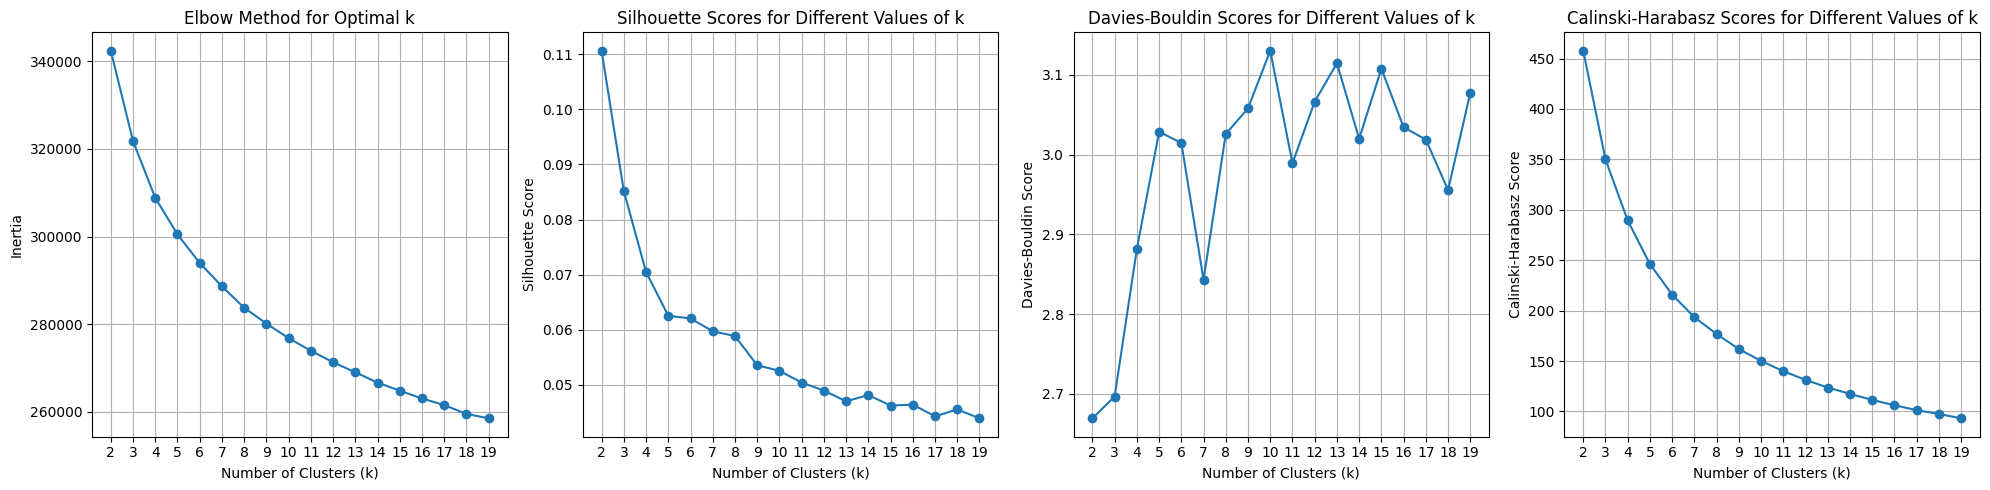

In [63]:
# Select features for clustering
features = outfield_df.drop(columns=['Player', 'Versus', 'BasedOnMinutes', 'scouting_period'])

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Range of k values to try
k_values = range(2, 20)
inertia = []
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

# Loop through different values of k
for k in k_values:
    k_means = KMeans(n_clusters=k, random_state=42, n_init=10, init='k-means++')
    k_means.fit(scaled_features)
    labels = k_means.labels_
    
    inertia.append(k_means.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, labels))
    davies_bouldin_scores.append(davies_bouldin_score(scaled_features, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(scaled_features, labels))

# Plot the evaluation metrics
plt.figure(figsize=(20, 5))

# Plot the inertia values (Elbow Method)
plt.subplot(1, 4, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

# Plot the silhouette scores
plt.subplot(1, 4, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

# Plot the Davies-Bouldin scores
plt.subplot(1, 4, 3)
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Score')
plt.xticks(k_values)
plt.grid(True)

# Plot the Calinski-Harabasz scores
plt.subplot(1, 4, 4)
plt.plot(k_values, calinski_harabasz_scores, marker='o')
plt.title('Calinski-Harabasz Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

In [64]:
# Function to find the elbow point
def find_elbow_point(inertia):
    diff = np.diff(inertia)
    diff_r = diff[1:] / diff[:-1]
    elbow_point = np.argmin(diff_r) + 2  # +2 because diff reduces the length by 1 and we start from k=2
    return elbow_point

# Find the best k for each metric
best_k_elbow = find_elbow_point(inertia)
best_k_silhouette = k_values[np.argmax(silhouette_scores)]
best_k_davies_bouldin = k_values[np.argmin(davies_bouldin_scores)]
best_k_calinski_harabasz = k_values[np.argmax(calinski_harabasz_scores)]

print(f"Best k according to Elbow Method: {best_k_elbow}")
print(f"Best k according to Silhouette Score: {best_k_silhouette}")
print(f"Best k according to Davies-Bouldin Score: {best_k_davies_bouldin}")
print(f"Best k according to Calinski-Harabasz Score: {best_k_calinski_harabasz}")

Best k according to Elbow Method: 17
Best k according to Silhouette Score: 2
Best k according to Davies-Bouldin Score: 2
Best k according to Calinski-Harabasz Score: 2


# Classification

## KNN

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [69]:
# Manually specify certain players and their archetypes
player_archetypes = {
    'Trent Alexander-Arnold' : 'Wing Back'
}

# Add a new column for archetypes and label the specified players
outfield_df['Archetype'] = outfield_df['Player'].map(player_archetypes)

# Separate the labeled and un_labelled data
labeled_data = outfield_df.dropna(subset=['Archetype']).copy()
un_labelled_data = outfield_df[outfield_df['Archetype'].isna()].copy()

# continue...